In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

train = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Janta Hack TSF/Inputs/train.csv')
test=pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Janta Hack TSF/Inputs/test.csv')
test_id=pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Janta Hack TSF/Inputs/test.csv')
print(train.head(5))
print(test.head(5))
train.dtypes

   ID             datetime  temperature  var1  pressure  windspeed var2  \
0   0  2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910    A   
1   1  2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040    A   
2   2  2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435    A   
3   3  2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580    A   
4   4  2013-07-01 04:00:00        -11.4 -19.3    1005.0    586.600    A   

   electricity_consumption  
0                    216.0  
1                    210.0  
2                    225.0  
3                    216.0  
4                    222.0  
    ID             datetime  temperature  var1  pressure  windspeed var2
0  552  2013-07-24 00:00:00        -10.0 -16.4    1011.0    263.280    A
1  553  2013-07-24 01:00:00        -10.0 -20.7    1011.0    267.175    A
2  554  2013-07-24 02:00:00        -10.7 -17.1    1003.0    269.555    A
3  555  2013-07-24 03:00:00        -13.6 -20.7    1008.0    273.060    A
4  556  20

ID                           int64
datetime                    object
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                        object
electricity_consumption    float64
dtype: object

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

test.dtypes

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#fmri = sns.load_dataset("fmri")
plt.rcParams["figure.figsize"] = (50, 30)
ax = sns.lineplot(x="datetime", y="electricity_consumption", data=train)
#hue="Course_Domain",

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001384F8800D8> (for post_execute):


KeyboardInterrupt: 

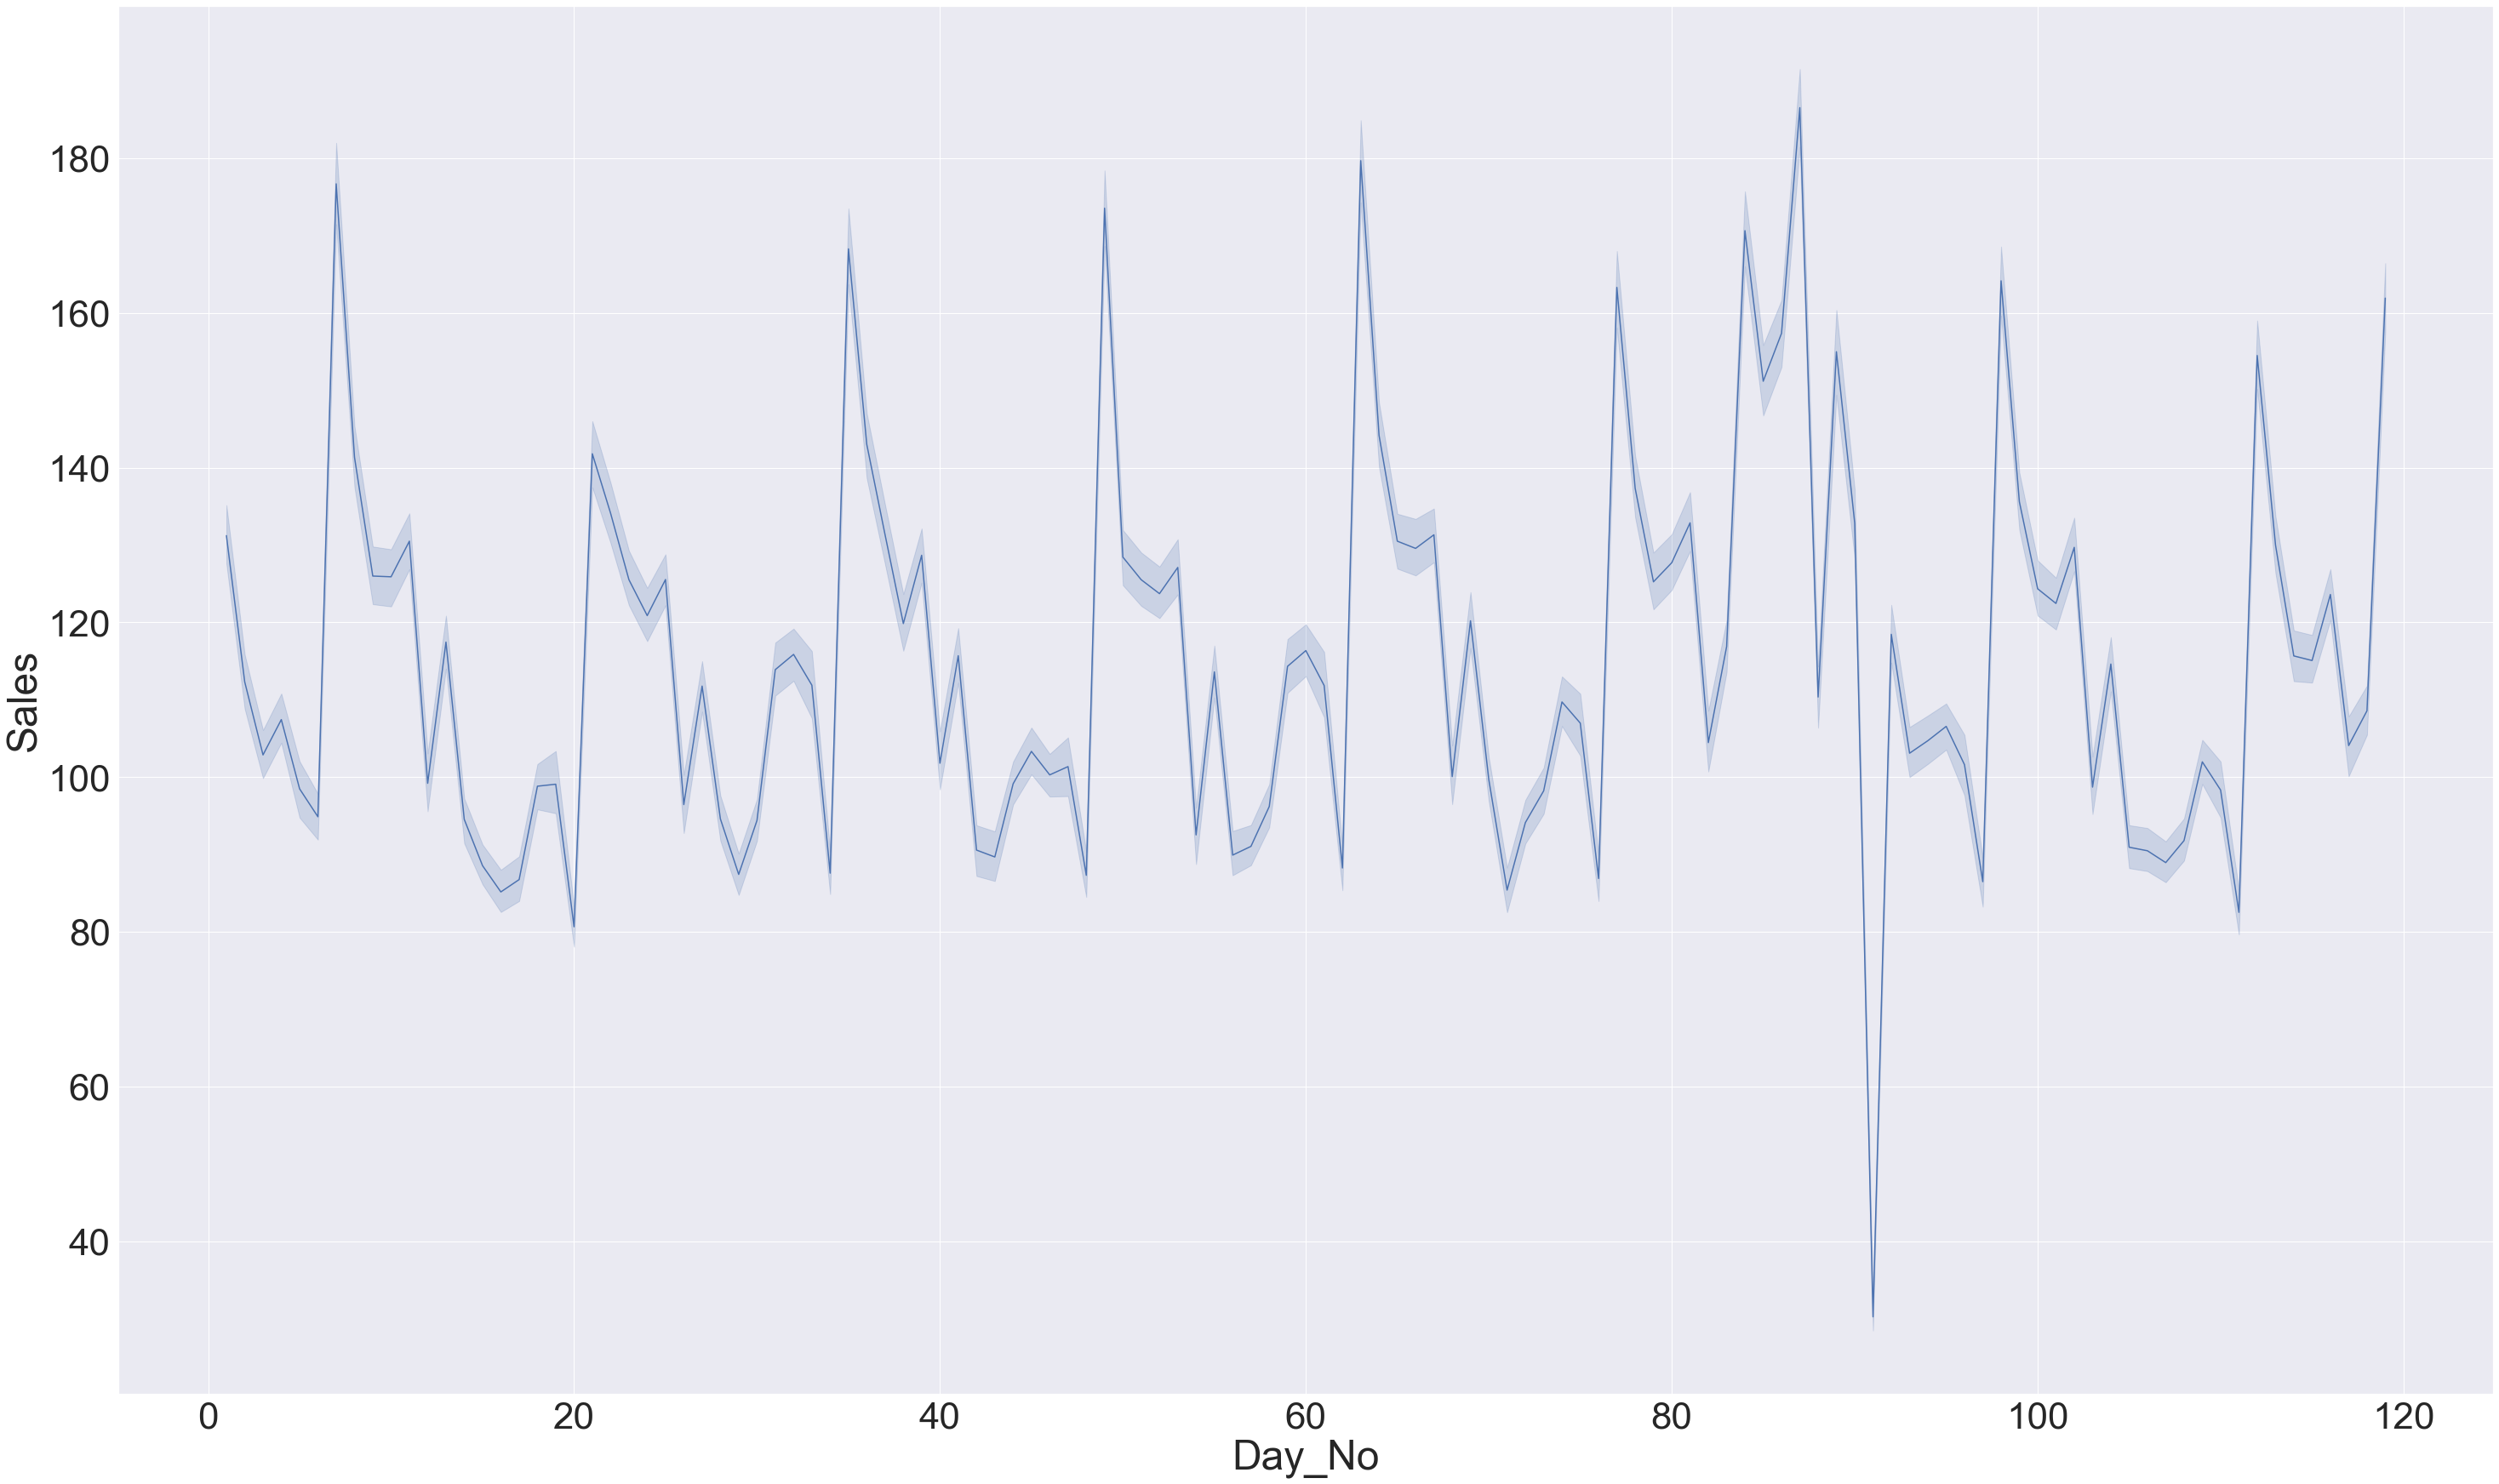

In [37]:
train_chart = train[train['Day_No']<120]
train_chart.head()

sns.set(font_scale = 4)
plt.rcParams["figure.figsize"] = (50, 30)
#plt.rcParams["axes.labelsize"] = 100
ax = sns.lineplot(x="Day_No", y="Sales", data=train_chart)
#hue="Course_Domain",
#hue="Course_Domain",

In [2]:


import datetime
def serial(srl_no):
    new_date = datetime.datetime(1970,1,1,0,0) + datetime.timedelta(srl_no - 1)
    return new_date.strftime("%Y-%m-%d")

#import datetime
train_date = train
train_date['date']= train_date['Day_No'].apply(lambda x: serial(x))
#serial_date_to_string(train_date['Day_No'])


In [3]:
train_date.head(1000)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,date
0,1,1,1,Development,Course,0,1,1,11004,0.007,81,1970-01-01
1,2,2,1,Development,Course,0,0,1,13650,0.007,79,1970-01-02
2,3,3,1,Development,Course,0,0,1,11655,0.007,75,1970-01-03
3,4,4,1,Development,Course,0,0,1,12054,0.007,80,1970-01-04
4,5,5,1,Development,Course,0,0,1,6804,0.007,41,1970-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1056,114,2,Development,Course,1,0,1,17598,0.186,145,1970-04-24
996,1057,115,2,Development,Course,1,0,1,16569,0.186,131,1970-04-25
997,1058,116,2,Development,Course,1,0,1,15624,0.186,130,1970-04-26
998,1059,117,2,Development,Course,0,0,1,9471,0.186,67,1970-04-27


In [23]:
from pmdarima import auto_arima
final_table= pd.DataFrame(columns=['Course_ID', 'Sales', 'Day_No'])
Day_No=range(883,943)
for ID in range(1,139):
    train_time=train_date[train_date['Course_ID']==ID]
    train_time=train_time[['date','Sales']]
    train_time['date'] = pd.to_datetime(train_time['date'])
    train_time.set_index('date',inplace=True)
    
    
    model = auto_arima(train_time, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           #parallel=True,n_jobs=8,
                           suppress_warnings=True, 
                           stepwise=True)
    print(model.aic())
    print(ID)
    model.fit(train_time)

    forecast = model.predict(n_periods=60)
    #forecast
    
    #print(forecast)
    s=pd.DataFrame({'Course_ID':ID,'Sales':forecast,'Day_No':Day_No})
    #print(s)
    final_table=final_table.append(s,ignore_index=True)

final_table.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Outputs/Arima_sarimax_with_m7(1-138 courses).csv',index=False)

    
    #forecast = pd.DataFrame(forecast,index = (883:942),columns=['Prediction'])
#print(train_time.head())
#train_time.dtypes

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7923.328, BIC=7947.194, Fit time=2.738 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9062.249, BIC=9071.795, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8179.018, BIC=8198.110, Fit time=0.577 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7996.459, BIC=8015.552, Fit time=0.955 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9060.250, BIC=9065.023, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=8850.189, BIC=8869.281, Fit time=0.351 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7795.918, BIC=7824.557, Fit time=1.769 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9505.934, BIC=9525.026, Fit time=0.502 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8627.904, BIC=8656.543, Fit time=3.953 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8656.674, BIC=8685.312, Fit time=5.343 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8883.665, BIC=8907.531, Fit time=2.404 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8717.949, BIC=8751.361, Fit time=6.712

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7838.230, BIC=7871.641, Fit time=6.482 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8079.392, BIC=8098.484, Fit time=0.855 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7938.891, BIC=7967.529, Fit time=3.107 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8047.742, BIC=8076.381, Fit time=2.260 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8792.313, BIC=8806.633, Fit time=0.992 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8535.857, BIC=8559.722, Fit time=1.021 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8536.362, BIC=8560.227, Fit time=0.835 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8538.825, BIC=8572.237, Fit time=3.373 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=6525.275, BIC=6557.032, Fit time=2.408 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 28.501 seconds
6378.621755154316
9
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7864.929, BIC=7888.794, Fit time=4.150 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9019.941, BIC=9029.488, Fit time=0.054 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8151.164, BIC=8170.256, Fit time=0.864 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7927.235, BIC=7946.328, Fit time=1.878 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9017.944, BIC=9022.718, Fit time=0.038

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9091.090, BIC=9110.182, Fit time=0.429 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8136.362, BIC=8165.000, Fit time=2.614 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8164.321, BIC=8192.960, Fit time=6.323 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8392.228, BIC=8416.093, Fit time=2.842 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8100.622, BIC=8134.033, Fit time=9.283

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6042.865, BIC=6070.085, Fit time=4.549 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 0, 7); AIC=6176.971, BIC=6204.192, Fit time=4.084 seconds
Near non-invertible roots for order (1, 1, 1)(2, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=6011.119, BIC=6047.412, Fit time=7.997 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=6036.653, BIC=6068.410, Fit time=6.077 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 7); AIC=6122.567, BIC=6154.323, Fit time=3.834 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=5988.445, BIC=6029.275, Fit time=9.313 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=5982.414, BIC=6018.708, Fit time=5.418 seconds
Near non-invertible roots for order (2, 1, 1)(1, 1, 2, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=9224.142, BIC=9243.234, Fit time=1.066 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=9099.466, BIC=9128.104, Fit time=4.528 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=9186.426, BIC=9215.065, Fit time=2.622 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=9443.289, BIC=9457.608, Fit time=0.591 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7933.561, BIC=7957.426, Fit time=3.734 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7927.362, BIC=7951.228, Fit time=1.719 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7907.828, BIC=7941.240, Fit time=4.162 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 41.266 seconds
7841.026270991504
18
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8164.949, BIC=8188.815, Fit time=2.335 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8587.712, BIC=8611.578, Fit time=2.798 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9737.812, BIC=9747.359, Fit time=0.105 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8802.969, BIC=8822.061, Fit time=0.773 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8610.897, BIC=8629.989, Fit time=0.926 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9735.818, BIC=9740.591, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9434.149, BIC=9453.241, Fit time=0.543 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8495.031, BIC=8523.669, Fit time=1.761 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=8439.639, BIC=8458.732, Fit time=0.455 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7565.282, BIC=7593.920, Fit time=3.103 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=7591.670, BIC=7620.309, Fit time=5.731 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=7823.228, BIC=7847.093, Fit time=1.784 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7544.018, BIC=7577.429, Fit time=7.839

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7742.100, BIC=7775.512, Fit time=5.353 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8083.059, BIC=8102.151, Fit time=0.658 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7948.912, BIC=7977.550, Fit time=3.428 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8050.853, BIC=8079.491, Fit time=1.908 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8463.278, BIC=8491.917, Fit time=4.464 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8755.863, BIC=8770.182, Fit time=1.016 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8461.396, BIC=8485.262, Fit time=3.461 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8457.582, BIC=8481.447, Fit time=1.844 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7887.048, BIC=7910.913, Fit time=1.686 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=8927.890, BIC=8937.437, Fit time=0.060 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8090.073, BIC=8109.165, Fit time=0.505 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7885.273, BIC=7904.366, Fit time=1.859 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=8925.900, BIC=8930.673, Fit time=0.037 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=8659.316, BIC=8678.409, Fit time=0.373 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7845.015, BIC=7873.654, Fit time=1.785 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9007.788, BIC=9026.880, Fit time=0.596 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8075.409, BIC=8104.047, Fit time=4.920 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8140.941, BIC=8169.579, Fit time=3.082 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8337.915, BIC=8361.781, Fit time=2.099 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8044.034, BIC=8077.446, Fit time=7.209

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8063.417, BIC=8096.829, Fit time=5.233 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8277.057, BIC=8296.149, Fit time=0.762 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8106.631, BIC=8135.269, Fit time=3.316 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8200.291, BIC=8228.930, Fit time=2.527 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8657.981, BIC=8672.301, Fit time=0.524 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8422.791, BIC=8446.656, Fit time=1.370 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8419.117, BIC=8442.982, Fit time=0.894 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8352.616, BIC=8386.028, Fit time=3.195 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8773.930, BIC=8797.795, Fit time=3.648 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9803.245, BIC=9812.791, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=9031.326, BIC=9050.418, Fit time=0.622 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8790.063, BIC=8809.156, Fit time=2.058 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9801.245, BIC=9806.018, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9571.228, BIC=9590.321, Fit time=0.468 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8708.775, BIC=8737.413, Fit time=3.822 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7284.629, BIC=7302.776, Fit time=0.394 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6344.609, BIC=6371.829, Fit time=3.258 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6421.837, BIC=6449.057, Fit time=5.097 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=6497.457, BIC=6520.141, Fit time=1.952 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6325.250, BIC=6357.007, Fit time=6.667

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7078.002, BIC=7096.149, Fit time=0.732 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6946.642, BIC=6973.862, Fit time=3.346 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7004.637, BIC=7031.857, Fit time=2.125 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7319.702, BIC=7333.312, Fit time=0.709 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7559.162, BIC=7583.027, Fit time=3.037 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7559.939, BIC=7583.804, Fit time=0.847 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7506.128, BIC=7539.539, Fit time=2.950 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 32.183 seconds
7383.845561590178
45
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8094.413, BIC=8118.279, Fit time=1.378 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=9279.918, BIC=9303.783, Fit time=1.121 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=10326.013, BIC=10335.559, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=9464.783, BIC=9483.875, Fit time=0.779 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=9285.985, BIC=9305.077, Fit time=0.815 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=10324.013, BIC=10328.786, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=10090.134, BIC=10109.227, Fit time=0.413 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=9154.233, BIC=9182.871, Fit time=2.741 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at lea

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=8813.655, BIC=8832.747, Fit time=0.455 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7768.030, BIC=7796.668, Fit time=3.283 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=7808.230, BIC=7836.868, Fit time=5.212 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8038.793, BIC=8062.658, Fit time=2.233 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7734.818, BIC=7768.229, Fit time=6.228

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8375.155, BIC=8408.566, Fit time=7.873 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8702.550, BIC=8721.642, Fit time=0.795 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8539.400, BIC=8568.038, Fit time=3.566 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8634.911, BIC=8663.550, Fit time=1.604 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8447.839, BIC=8476.478, Fit time=1.792 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8671.365, BIC=8685.684, Fit time=0.736 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8446.459, BIC=8470.325, Fit time=1.496 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8445.297, BIC=8469.162, Fit time=0.997 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8534.688, BIC=8558.554, Fit time=0.927 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8451.876, BIC=8485.287, Fit time=4.081 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 32.746 seconds
8258.323775103054
56
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8362.831, BIC=8386.697, Fit time=2.756 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9558.132, BIC=9567.678, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8548.235, BIC=8567.327, Fit time=0.625 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8435.936, BIC=8455.028, Fit time=0.83

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=6434.381, BIC=6452.528, Fit time=0.553 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6312.498, BIC=6330.644, Fit time=0.735 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7212.116, BIC=7216.652, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=6961.388, BIC=6979.535, Fit time=0.289 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6119.759, BIC=6146.979, Fit time=2.926 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=6387.859, BIC=6410.542, Fit time=0.982 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=6139.391, BIC=6171.148, Fit time=3.674 seconds
Near non-invertible roots for order (1, 1, 1)(2, 1, 1, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8169.132, BIC=8197.771, Fit time=4.139 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8194.965, BIC=8223.603, Fit time=3.036 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8419.210, BIC=8443.075, Fit time=2.246 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8134.438, BIC=8167.850, Fit time=6.371 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=7115.292, BIC=7137.975, Fit time=2.159 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=7005.816, BIC=7037.573, Fit time=5.047 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=7039.052, BIC=7070.809, Fit time=4.258 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=7396.478, BIC=7414.625, Fit time=1.811 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=7033.688, BIC=7060.908, Fit time=3.302 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle

Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8344.229, BIC=8368.095, Fit time=0.903 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8281.666, BIC=8315.078, Fit time=3.773 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 31.305 seconds
8156.431618715674
64
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7882.951, BIC=7906.816, Fit time=1.131 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9007.375, BIC=9016.921, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8001.925, BIC=8021.017, Fit time=0.558 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7893.974, BIC=7913.066, Fit time=1.20

Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=6400.613, BIC=6436.907, Fit time=3.986 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 0, 7); AIC=6938.959, BIC=6970.716, Fit time=2.200 seconds
Near non-invertible roots for order (2, 1, 3)(0, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 1, 2, 7); AIC=6448.481, BIC=6489.311, Fit time=6.037 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 0, 7); AIC=6609.801, BIC=6646.095, Fit time=2.794 seconds
Near non-invertible roots for order (2, 1, 3)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 2, 7); AIC=6424.421, BIC=6469.788, Fit time=7.560 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 1, 7); AIC=6419.275, BIC=6451.032, Fit time=3.499 seconds
Near non-invertible roots for order (1, 1,

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8792.635, BIC=8816.501, Fit time=1.120 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8790.451, BIC=8814.316, Fit time=1.043 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8768.239, BIC=8801.651, Fit time=2.894 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 29.904 seconds
8466.1714655775
68
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7812.687, BIC=7836.552, Fit time=2.365 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1,

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8351.114, BIC=8374.979, Fit time=1.951 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9157.695, BIC=9167.241, Fit time=0.055 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8556.755, BIC=8575.847, Fit time=0.673 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8352.606, BIC=8371.699, Fit time=1.504 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9155.700, BIC=9160.473, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=8886.121, BIC=8905.213, Fit time=0.446 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8331.697, BIC=8360.335, Fit time=3.355 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8461.182, BIC=8485.047, Fit time=1.107 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=8300.451, BIC=8333.863, Fit time=3.725 seconds
Near non-invertible roots for order (

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=9034.059, BIC=9062.697, Fit time=3.738 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=9276.349, BIC=9300.215, Fit time=2.209 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=9015.360, BIC=9048.771, Fit time=7.752 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=9174.170, BIC=9193.262, Fit time=1.307 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6457.135, BIC=6484.355, Fit time=1.895 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=6543.194, BIC=6570.414, Fit time=1.539 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=6810.527, BIC=6824.137, Fit time=0.795 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=6541.220, BIC=6563.903, Fit time=0.840 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7852.074, BIC=7875.939, Fit time=0.910 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7846.577, BIC=7870.442, Fit time=0.822 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7762.712, BIC=7796.124, Fit time=3.696 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 31.557 seconds
7607.64186459661
77
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6395.216, BIC=6417.900, Fit time=2.598 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7144.427, BIC=7168.292, Fit time=2.720 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=8320.221, BIC=8329.768, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7560.026, BIC=7579.119, Fit time=0.503 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7173.977, BIC=7193.070, Fit time=2.304 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=8318.230, BIC=8323.003, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7951.467, BIC=7970.559, Fit time=0.426 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=7100.110, BIC=7128.748, Fit time=2.135 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9594.508, BIC=9613.600, Fit time=0.461 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8628.718, BIC=8657.356, Fit time=1.794 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8635.195, BIC=8663.834, Fit time=5.607 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8907.824, BIC=8931.690, Fit time=1.954 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8605.493, BIC=8638.904, Fit time=6.216

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7934.839, BIC=7968.250, Fit time=7.134 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8141.172, BIC=8160.264, Fit time=0.681 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8011.494, BIC=8040.132, Fit time=2.737 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8097.750, BIC=8126.388, Fit time=2.255 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8211.084, BIC=8239.722, Fit time=4.309 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8498.153, BIC=8512.472, Fit time=1.201 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8222.256, BIC=8246.121, Fit time=2.587 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8203.652, BIC=8227.517, Fit time=1.837 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8598.846, BIC=8632.258, Fit time=3.990 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 32.701 seconds
8514.431332586148
88
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8208.025, BIC=8231.891, Fit time=3.131 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9396.735, BIC=9406.282, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8415.424, BIC=8434.516, Fit time=0.710 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8289.217, BIC=8308.310, Fit time=0.989 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9394.739, BIC=9399.512, Fit time=0.03

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7677.312, BIC=7695.458, Fit time=0.367 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6744.798, BIC=6772.018, Fit time=3.611 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=6967.307, BIC=6989.991, Fit time=1.789 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=7102.959, BIC=7134.715, Fit time=1.433 seconds
Near non-invertible roots for order (1, 1, 1)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6744.119, BIC=6775.876, Fit time=4.935 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7691.959, BIC=7725.370, Fit time=7.527 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7849.007, BIC=7868.100, Fit time=1.342 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7727.032, BIC=7755.670, Fit time=3.253 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7766.372, BIC=7795.010, Fit time=3.232 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=9472.219, BIC=9486.538, Fit time=0.584 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=9225.481, BIC=9249.346, Fit time=1.181 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=9222.382, BIC=9246.247, Fit time=0.988 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=9197.219, BIC=9230.631, Fit time=3.660 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 0, 7); AIC=6354.904, BIC=6386.661, Fit time=2.422 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 1, 7); AIC=6112.478, BIC=6153.309, Fit time=6.108 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 7); AIC=6110.497, BIC=6151.328, Fit time=6.823 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=6694.828, BIC=6722.048, Fit time=1.376 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 7); AIC=6127.524, BIC=6163.818, Fit time=7.047 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 0, 7); AIC=6282.007, BIC=6318.301, Fit time=3.695 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=

Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 7); AIC=6029.015, BIC=6060.772, Fit time=5.598 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6028.100, BIC=6059.857, Fit time=5.124 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6030.119, BIC=6057.340, Fit time=4.418 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 0, 7); AIC=6203.582, BIC=6230.802, Fit time=3.820 seconds
Near non-invertible roots for order (1, 1, 1)(2, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=6027.349, BIC=6063.643, Fit time=6.828 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6029.757, BIC=6052.441, Fit time=2.457 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=6126.986, BIC=6149.670, Fit time=1.486 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6053.859, BIC=6085.616, Fit time=

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7993.888, BIC=8008.207, Fit time=0.981 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7637.448, BIC=7661.313, Fit time=2.528 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7677.729, BIC=7701.594, Fit time=1.064 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7604.475, BIC=7637.886, Fit time=3.619 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8166.729, BIC=8200.140, Fit time=4.286 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 28.888 seconds
8044.044121806335
103
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6904.286, BIC=6926.969, Fit time=1.953 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7803.284, BIC=7812.357, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7051.083, BIC=7069.230, Fit time=0.637 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7005.561, BIC=7023.708, Fit time=1.335 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7801.288, BIC=7805.824, Fit time=0.0

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8164.042, BIC=8192.681, Fit time=3.202 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8429.198, BIC=8453.063, Fit time=2.029 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8096.293, BIC=8129.705, Fit time=7.777 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8368.054, BIC=8387.147, Fit time=0.640 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8018.652, BIC=8047.291, Fit time=2.871 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8022.305, BIC=8050.943, Fit time=3.785 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8383.838, BIC=8398.158, Fit time=0.741 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8083.058, BIC=8106.923, Fit time=3.414 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=6200.269, BIC=6227.489, Fit time=2.118 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=6172.034, BIC=6208.327, Fit time=3.098 seconds
Total fit time: 52.104 seconds
6171.9832086464285
110
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6867.082, BIC=6889.765, Fit time=1.032 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7720.136, BIC=7729.210, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=6952.217, BIC=6970.363, Fit time=0.666 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6893.563, BIC=6911.710, Fit time=0.717 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7718.139, BIC=7722.676, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7430.843, BIC=7448.990, Fit time=0.326 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6753.267, BIC=6780.487, Fit ti

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8196.841, BIC=8230.252, Fit time=3.065 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 33.503 seconds
8006.883604115083
112
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=9085.514, BIC=9109.379, Fit time=1.370 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=10126.957, BIC=10136.503, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=9235.498, BIC=9254.590, Fit time=0.751 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=9085.643, BIC=9104.736, Fit time=0.990 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=10124.957, BIC=10129.730, Fit time

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9189.992, BIC=9209.084, Fit time=0.264 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=8192.892, BIC=8221.530, Fit time=2.750 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=8219.970, BIC=8248.608, Fit time=6.568 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8396.865, BIC=8420.731, Fit time=2.106 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8094.380, BIC=8127.791, Fit time=7.295

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=8192.334, BIC=8225.745, Fit time=5.638 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8315.539, BIC=8334.632, Fit time=1.552 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8147.364, BIC=8176.003, Fit time=3.413 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8254.557, BIC=8283.195, Fit time=4.358 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7863.634, BIC=7892.272, Fit time=1.716 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8134.799, BIC=8149.118, Fit time=0.551 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7861.744, BIC=7885.609, Fit time=1.174 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7855.228, BIC=7879.094, Fit time=1.019 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=5994.484, BIC=6030.777, Fit time=4.351 seconds
Total fit time: 52.350 seconds
5990.371341679856
121
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8438.658, BIC=8462.524, Fit time=2.769 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9552.387, BIC=9561.933, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=8694.436, BIC=8713.529, Fit time=0.575 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8472.179, BIC=8491.271, Fit time=0.735 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=9550.395, BIC=9555.168, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=9277.262, BIC=9296.354, Fit time=0.397 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_orde

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7783.486, BIC=7802.578, Fit time=0.537 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6969.548, BIC=6998.187, Fit time=1.809 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6985.221, BIC=7013.859, Fit time=4.854 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=7197.375, BIC=7221.241, Fit time=1.887 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6944.100, BIC=6977.511, Fit time=6.388

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7784.610, BIC=7803.703, Fit time=1.524 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=7687.351, BIC=7715.989, Fit time=3.256 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7751.060, BIC=7779.698, Fit time=1.438 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8008.443, BIC=8022.762, Fit time=1.261 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=7013.866, BIC=7027.476, Fit time=0.850 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=6809.457, BIC=6832.140, Fit time=1.869 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=6807.700, BIC=6830.383, Fit time=0.766 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=6727.007, BIC=6758.764, Fit time=2.732 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=7476.157, BIC=7509.568, Fit time=5.863 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 44.688 seconds
7411.129120707299
130
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6290.383, BIC=6313.066, Fit time=3.655 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7101.137, BIC=7110.210, Fit time=0.070 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=6551.898, BIC=6570.044, Fit time=0.539 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6330.149, BIC=6348.296, Fit time=1.725 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7099.137, BIC=7103.673, Fit time=0.0

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=7909.400, BIC=7938.038, Fit time=6.113 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=8174.049, BIC=8197.915, Fit time=3.383 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=7866.872, BIC=7900.283, Fit time=10.468 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8006.572, BIC=8025.665, Fit time=2.477 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inv

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8642.677, BIC=8661.770, Fit time=1.000 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=8520.927, BIC=8549.565, Fit time=4.437 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8544.738, BIC=8573.376, Fit time=8.215 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8901.505, BIC=8915.824, Fit time=0.721 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inve

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8545.649, BIC=8559.968, Fit time=0.555 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8266.102, BIC=8289.967, Fit time=1.098 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=8263.838, BIC=8287.704, Fit time=0.831 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=8205.894, BIC=8239.306, Fit time=3.503 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 7); setting score to inf (at least one inve

In [21]:
#final_table
#final_table.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Outputs/Arima_sarimax_with_m7(83-138 courses).csv',index=False)


In [41]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train_time, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=15,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
#print(stepwise_model.aic())

stepwise_model.fit(train_model)
future_forecast = stepwise_model.predict(n_periods=96)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 15); AIC=8155.800, BIC=8179.620, Fit time=13.231 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 15); AIC=9257.520, BIC=9267.047, Fit time=0.139 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 15); AIC=8719.704, BIC=8738.760, Fit time=3.080 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 15); AIC=8191.484, BIC=8210.540, Fit time=14.095 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 15); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 15); AIC=9255.531, BIC=9260.295, Fit time=0.101 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 15); AIC=8695.141, BIC=8714.196, Fit time=0.703 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 15); AIC=8160.488, BIC=8189.071, Fit time=15.892 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 15); setting score to inf (

KeyboardInterrupt: 

In [8]:
#load the data
#data = pd.read_csv('international-airline-passengers.csv')

#divide into train and validation set
train = train_time[:int(0.7*(len(train_time)))]
valid = train_time[int(0.7*(len(train_time))):]

#preprocessing (since arima takes univariate series as input)
#train.drop('Month',axis=1,inplace=True)
#valid.drop('Month',axis=1,inplace=True)

#plotting the data
#train['International airline passengers'].plot()
#valid['International airline passengers'].plot()

In [9]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')

sns.set(font_scale = 1)
plt.rcParams["figure.figsize"] = (100, 10)

plt.show()


ValueError: bad input shape (617, 2)

In [2]:
list = ['ID','Course_ID']

#promotion and holiday flags to be tried as objects seperately

for x in train.columns:
    if x in list:
        train[x]=train[x].astype(np.object)        
    
for x in test.columns:
    if x in list:
        test[x]=test[x].astype(np.object)

test=test.drop(['ID'],axis=1)
train = train.drop(['ID','User_Traffic'],axis=1)

print(test.dtypes)

print(train.shape)
print(test.shape)


Day_No                  int64
Course_ID              object
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
Competition_Metric    float64
dtype: object
(512087, 9)
(36000, 8)


In [3]:
train = pd.get_dummies(train, columns=['Course_ID','Course_Domain','Course_Type'],drop_first=True)
test = pd.get_dummies(test, columns=['Course_ID','Course_Domain','Course_Type'],drop_first=True)

print(train.shape)
print(test.shape)

(512087, 610)
(36000, 609)


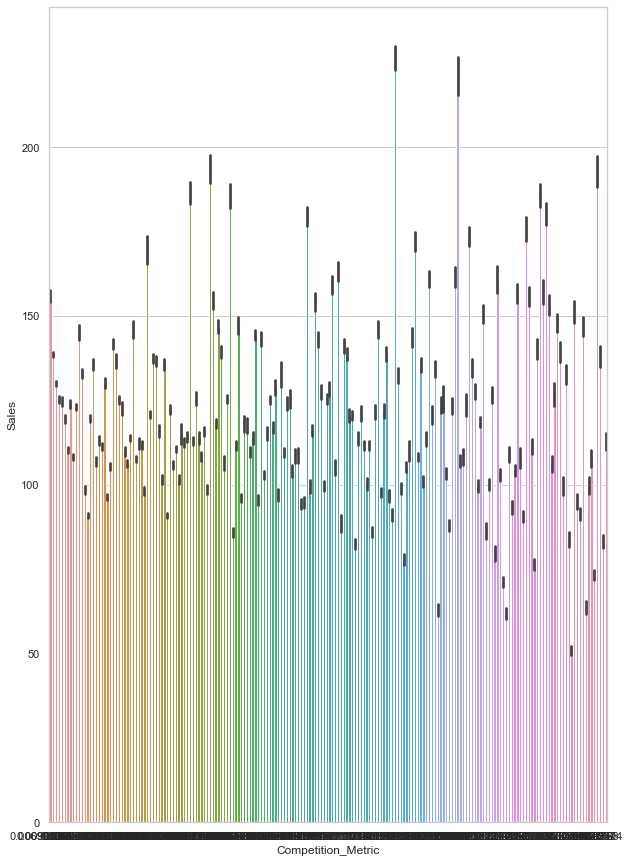

In [17]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x='Competition_Metric', y="Sales", data=train)

plt.rcParams["figure.figsize"] = (20, 10)
#plt.rcParams["xtick.labelsize"] = 20
#plt.autofmt_x()

In [20]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#fmri = sns.load_dataset("fmri")
plt.rcParams["figure.figsize"] = (20, 10)
ax = sns.lineplot(x="User_Traffic", y="Sales", data=train)

ValueError: Could not interpret input 'User_Traffic'

In [5]:
#Alternate code for grodsearch

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import fbeta_score, make_scorer
MSE = make_scorer(mean_squared_error, greater_is_better=False)

#RMSE = sqrt(mean_squared_error())

from sklearn.metrics import mean_squared_log_error
#RMSLE=np.sqrt(mean_squared_log_error( y, predictions ))


In [ ]:
#Alternate code for gridsearch with stratkfold\n",
X,y=train.drop(['Sales'],axis=1),train.Sales
params = {'n_estimators': [600,1000],
        'reg_lambda' : [4,9],
        'learning_rate' : [0.03,0.13],
        'depth' : [4,7],
        'bagging_temperature' : [1]
        }                        
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV

categorical_features_indices = np.where(X.dtypes =='object')[0]
catb = CatBoostRegressor(cat_features=categorical_features_indices,random_seed=13,early_stopping_rounds=100)

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 13)
print('start_gridsearch')
grid = GridSearchCV(estimator=catb, param_grid=params, cv=skf.split(X,y),verbose=100,scoring = MSE )
print('start_fit')
grid.fit(X, y)

results = pd.DataFrame(grid.cv_results_)

results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Outputs/Catreg_tuning_v1', index=False)

In [7]:
#Catboost without gridsearch
    
from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
from sklearn.model_selection import KFold,train_test_split
X,y=train.drop(['Sales'],axis=1),train.Sales
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 13)
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
err=[]
y_pred_tot=[]
cat_model5 = CatBoostRegressor(n_estimators=1200, # use large n_estimators deliberately to make use of the early stopping
                         reg_lambda=4,
                         eval_metric='RMSE',
                         random_seed=13,
                         learning_rate = 0.13,
                         depth = 7,
                         bagging_temperature = 1.0,cat_features=categorical_features_indices)

cat_model5.fit(X_train.values,y_train.values,eval_set=(X_val, y_val),plot=False,use_best_model=True,verbose_eval=50)
pred = cat_model5.predict(test)
y_pred_tot.append(pred)

0:	learn: 52.6747711	test: 52.8756585	best: 52.8756585 (0)	total: 138ms	remaining: 2m 45s
50:	learn: 39.4166596	test: 39.6195243	best: 39.6195243 (50)	total: 4.57s	remaining: 1m 42s
100:	learn: 36.0046253	test: 36.1968977	best: 36.1968977 (100)	total: 8.9s	remaining: 1m 36s
150:	learn: 33.6896645	test: 33.8682415	best: 33.8682415 (150)	total: 13.3s	remaining: 1m 32s
200:	learn: 32.0133079	test: 32.1824294	best: 32.1824294 (200)	total: 17.5s	remaining: 1m 27s
250:	learn: 30.7097005	test: 30.8755234	best: 30.8755234 (250)	total: 22.3s	remaining: 1m 24s
300:	learn: 29.5902704	test: 29.7524116	best: 29.7524116 (300)	total: 26.9s	remaining: 1m 20s
350:	learn: 28.7114219	test: 28.8732301	best: 28.8732301 (350)	total: 31.2s	remaining: 1m 15s
400:	learn: 27.9889588	test: 28.1610624	best: 28.1610624 (400)	total: 35.2s	remaining: 1m 10s
450:	learn: 27.3196084	test: 27.5078661	best: 27.5078661 (450)	total: 39.5s	remaining: 1m 5s
500:	learn: 26.7622505	test: 26.9583573	best: 26.9583573 (500)	total

In [8]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)

nan


C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
s=pd.DataFrame({'ID':test_id.ID,'Sales':y_pred})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Outputs/Catreg_v0.1(RMSE for tuning_flagsasobjects).csv',index=False)
s.head()

,ID,Sales
0,883,156.905877
1,884,156.905877
2,885,156.905877
3,886,156.905877
4,887,85.113568


   Year  Month  Day  days  case_count  dayofweek_Monday  dayofweek_Saturday  \
0  2017      4    1    90       299.0                 0                   1   
1  2017      4    3    92        42.0                 1                   0   
2  2017      4    4    93        23.0                 0                   0   
3  2017      4    5    94      1530.0                 0                   0   
4  2017      4    7    96      1341.0                 0                   0   

   dayofweek_Sunday  dayofweek_Thursday  dayofweek_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  1   
3                 0                   0                  0   
4                 0                   0                  0   

   dayofweek_Wednesday  segment_2 year_month  
0                    0          0      20174  
1                    0          0      20174  
2          

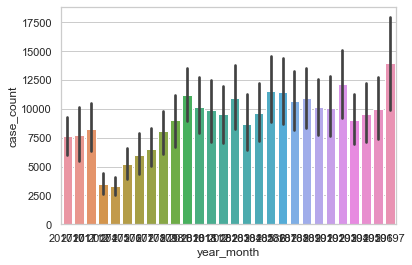

In [65]:
train_chart=train
train_chart['year_month']=train_chart['Year'].astype(str)+train_chart['Month'].astype(str)
print(train_chart.head())
print(train_chart.describe())
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x='year_month', y="case_count", data=train_chart)

In [66]:
train_chart_line=train.groupby(['application_date'])['case_count'].sum().reset_index()
train_chart_line.head()

KeyError: 'application_date'

In [67]:
sns.set(style='darkgrid')
sns.lineplot(x='application_date', y='case_count', data=train_chart_line)
plt.figure(figsize=(8,4))
plt.rcParams["figure.figsize"] = (50, 6)
plt.rcParams["xtick.labelsize"] = 7

NameError: name 'train_chart_line' is not defined

In [71]:
test_id=test

test_id.shape

(180, 11)

In [69]:
test.drop('application_date',axis=1,inplace=True)

In [25]:
def mape(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    error = (predict - actual)/actual
    abs_error = np.absolute(error)
    
    #square_distance = distance ** 2

    #mean_square_distance = square_distance.mean()

    score = np.mean(abs_error)

    return score

from sklearn.metrics import make_scorer
mape_score = make_scorer(mape,greater_is_better = False)

#gsSVR = GridSearchCV(...scoring=rmse_score...)
#gsSVR.fit(X_train,Y_train)
#SVR_best = gsSVR.best_estimator_
#print(gsSVR.best_score_)

In [26]:
#Alternate code for gridsearch/tuning

# A parameter grid for XGBoost
params = {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.8,1],
        'max_depth': [ 5, 8,10],
        'learning_rate':[0.01,0.1,0.3],
        'n_estimators':[30,50,80]
        }



Xd,yd=train.drop('case_count',axis=1),train.case_count
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xg = xgb.XGBRegressor(eval_metric='auc',verbose=100, nthread=4)          

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xg, param_grid=params, n_jobs=4,scoring=mape_score, cv=skf.split(Xd,yd), verbose=100 )
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_tuning_aggregated_v0.3_saved.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pick

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    6.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  19 tasks      | elapsed:    6.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    6.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:    7.5s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    7.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    8.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    8.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap


Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:    9.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  82 tasks      | elapsed:    9.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 100 tasks      | elapsed:   10.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 101 tasks      | elapsed:   10.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:   10.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 122 tasks      | elapsed:   10.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 123 tasks      | elapsed:   11.0s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 124 tasks      | elapsed:   11.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:   11.9s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:   12.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:   12.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 163 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 164 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 165 tasks      | elapsed:   13.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 185 tasks      | elapsed:   14.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=obje

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:   15.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 209 tasks      | elapsed:   15.6s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 230 tasks      | elapsed:   16.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 231 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:   16.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 249 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 250 tasks      | elapsed:   17.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 251 tasks      | elapsed:   17.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 252 tasks      | elapsed:  

[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed:   19.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:   19.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed:   19.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 293 tasks      | elapsed:   20.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 294 tasks      | elapsed:   20.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 315 tasks      | elapsed:   22.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 316 tasks      | elapsed:   22.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 317 tasks      | elapsed:   22.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:   24.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 337 tasks      | elapsed:   24.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 338 tasks      | elapsed:   24.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   25.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 358 tasks      | elapsed:   25.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 377 tasks      | elapsed:   26.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 378 tasks      | elapsed:   26.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 379 tasks      | elapsed:   26.8s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 399 tasks      | elapsed:   28.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 400 tasks      | elapsed:   28.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 419 tasks      | elapsed:   29.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=obje

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 439 tasks      | elapsed:   30.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 440 tasks      | elapsed:   30.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap


Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 460 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 461 tasks      | elapsed:   32.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 481 tasks      | elapsed:   33.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 482 tasks      | elapsed:   33.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 483 tasks      | elapsed:   33.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 503 tasks      | elapsed:   34.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   34.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 523 tasks      | elapsed:   35.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 524 tasks      | elapsed:   35.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 525 tasks      | elapsed:   36.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed:   37.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed:   37.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 548 tasks      | elapsed:   38.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 566 tasks      | elapsed:   39.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 567 tasks      | elapsed:   39.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 568 tasks      | elapsed:   40.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 586 tasks      | elapsed:   41.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 587 tasks      | elapsed:   41.2s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 588 tasks      | elapsed:   41.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 606 tasks      | elapsed:   42.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 607 tasks      | elapsed:   42.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 608 tasks      | elapsed:   42.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 627 tasks      | elapsed:   44.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 628 tasks      | elapsed:   44.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 629 tasks      | elapsed:   44.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 647 tasks      | elapsed:   46.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 648 tasks      | elapsed:   46.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 649 tasks      | elapsed:   46.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 667 tasks      | elapsed:   47.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 668 tasks      | elapsed:   47.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 669 tasks      | elapsed:   47.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 689 tasks      | elapsed:   48.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 690 tasks      | elapsed:   48.6s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 691 tasks      | elapsed:   48.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 712 tasks      | elapsed:   50.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 713 tasks      | elapsed:   50.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed:   50.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [29]:
#XGBoost code,using tuned models to predict

X,y=train.drop('case_count',axis=1),train.case_count

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
xg_reg = xgb.XGBRegressor(eval_metric='mae',learning_rate = 0.1,
                max_depth = 10,colsample_bytree=1, subsample=0.6, n_estimators = 50,verbose=50)

err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
#fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
#    y_train, y_test = yd[train_index], yd[test_index]
print('start')
xg_reg.fit(X,y)
#    print('pred...')
#    p=xg_reg.predict(X_test)
#    print("err: ",100*np.sqrt(mean_squared_error(y_test,p)))
#    err.append(100*np.sqrt(mean_squared_error(y_test,p)))
pred = xg_reg.predict(test)
y_pred_tot.append(pred)

start
[02:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)
print(y_pred)

s=pd.DataFrame({'case_count':y_pred})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_Aggregated_Tuned(MAPE)_0.4_saved.csv',index=False)
s.head()

nan
[  493.16946   922.5239   1951.0424   1236.9591   1398.5204   1146.6586
  1186.8615    884.17395   994.9442   2032.2095   1441.6489   1533.3823
  1379.3945   1448.5243    983.5311    992.43005  2062.6023   1398.7805
  1543.2563   1393.371    1409.0488   1091.2083    895.1706   1833.3695
  1822.7749   5286.634    1395.6985   1062.7444    931.4177    951.1101
  1751.1096   1335.5176   1402.7985   1284.9678   1400.3104   1135.4304
   919.4193   2290.7153   1532.4636   1621.8418   1272.8203   1353.4248
  1056.6837    927.92957  2237.2437   1353.5175   1479.1985   1367.8851
  1367.4012   1020.808     969.69885  2032.4067   1421.9232   1460.9567
  1481.3188   2017.4086   7789.5225    374.22882  1275.8682   1188.1482
  1117.6135    870.7744   1074.3397    851.56836   688.6576   1773.2054
  1413.9429   1572.4093   1409.562    1425.24     1074.3976    840.75415
  1809.7173   1296.206    1459.4868   1318.2899   1285.8622    899.0741
   926.7855   1806.928    1311.5874   1435.0624   1304.5057

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,case_count
0,493.169464
1,922.523926
2,1951.042358
3,1236.959106
4,1398.520386
